# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [5, 220, 400]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9413,8259,5126,666,1795,1451
1,14755,899,1382,1765,56,749
2,4446,906,1238,3576,153,1014


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
The std deviaitons for the statistics for whole dataset for most of the features are larger than or comparable to the mean, indicating the data could have large outliers and/or skewed distribution (mean - 1sigma <=0). For comparing the samples to the distribution of whole dataset, it is better to use medians and the Quartiles.     
* Sample 1: Has spending values for all features/categories between 75%-50%, except for "Frozen". This would indicate it is a typical large grocery/retail store.     
* Sample 2: Has values for "Fresh" between max-75%, "Frozen" between 75%-50% and Delicatessen between 50%-25%. Other categrories have values below 25%. This indicates a this is a store specializing in Fresh/Frozen/Delciatessen possibly a food store or a restaurant.     
* Sample 3: Has values for "Frozen" at max-75%, "Delicatessen" at 75%-50% and "Fresh" between 50%-25%. All other categories have values below 25%. This indicates it is some kind of speciality store or cafe (e.g. selling ice-cream/cheese).   

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

Exploring Data Dependency: 


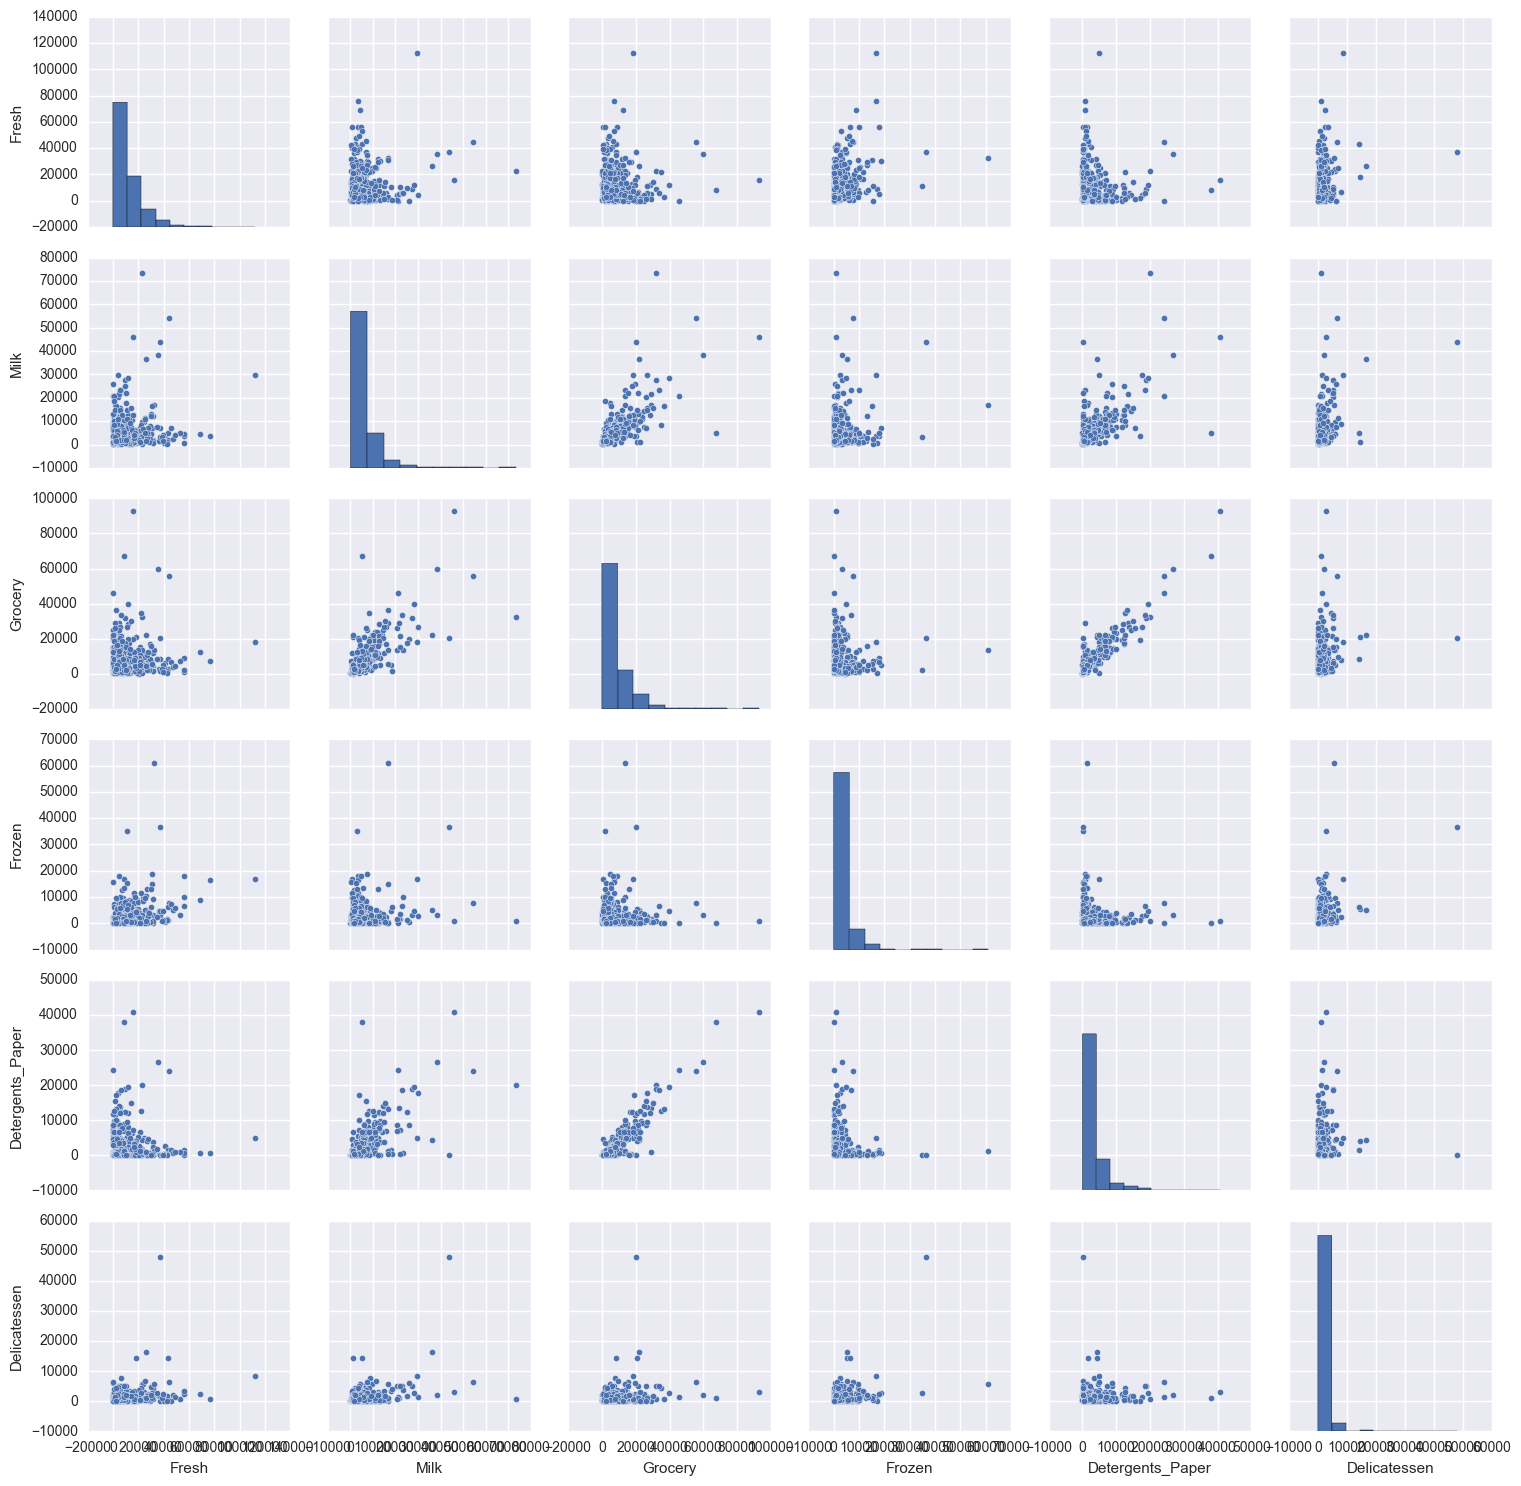

Of all features, Detergents_Paper spending showed good correlation to Grocery.
Grocery and Detergents_Paper show correlation, checking regression plot


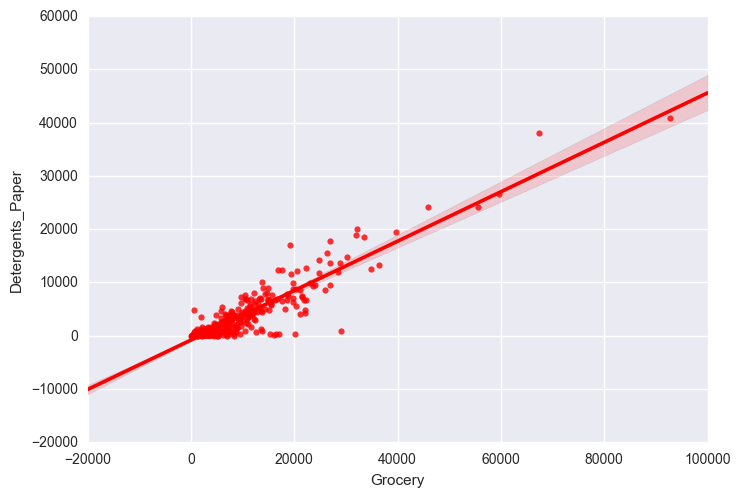

Dropped Detergents_Paper and used remaining features to predict it.


,Fresh,Milk,Grocery,Frozen,Delicatessen
0,12669,9656,7561,214,1338
1,7057,9810,9568,1762,1776
2,6353,8808,7684,2405,7844


R^2 score: 0.7287


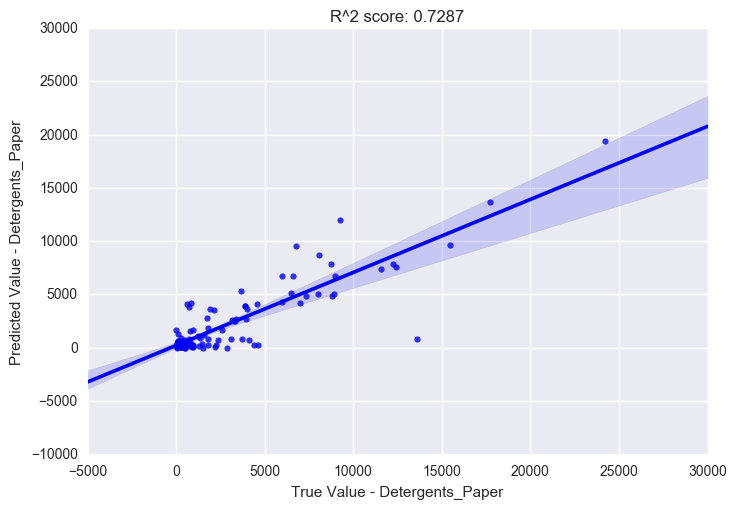

In [5]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
from sklearn.cross_validation import train_test_split
#from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

#Exploring Data Dependencies
import seaborn as sns
import matplotlib.pyplot as plt
print 'Exploring Data Dependency: '
#Seaborn Matrix Scatterplot 
sns.pairplot(data)
plt.show()

print "Of all features, Detergents_Paper spending showed good correlation to Grocery."
print "Grocery and Detergents_Paper show correlation, checking regression plot"
#Seaborn regression plot
sns.regplot(x=data['Grocery'], y=data['Detergents_Paper'], color="r")
plt.show()

print "Dropped Detergents_Paper and used remaining features to predict it."

new_data = data.drop(['Detergents_Paper'], axis = 1, inplace = False)
#Check whether it was dropped correctly
display(new_data.head(3))

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], test_size=0.25, random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0).fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

#R2 score and plotting predicted vs true correlation
print "R^2 score: {:5.4f}".format(score)
sns.regplot(x=y_test, y=regressor.predict(X_test), color="b");
plt.ylabel("Predicted Value - Detergents_Paper")
plt.xlabel("True Value - Detergents_Paper")
plt.title("R^2 score: {:5.4f}".format(score))
plt.show()

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** Matrix scatterplot analysis showed "Detergents_Paper" has linear dependence on "Grocery", indicating it as a good candidate feature to predict. The reported predition  (R^2) score for decision tree was 0.72, which is significantly higher. This indicates the model was able to predict the feature with good accuracy. The feature "Detergents_Paper" is not necessary to for identifying customers spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

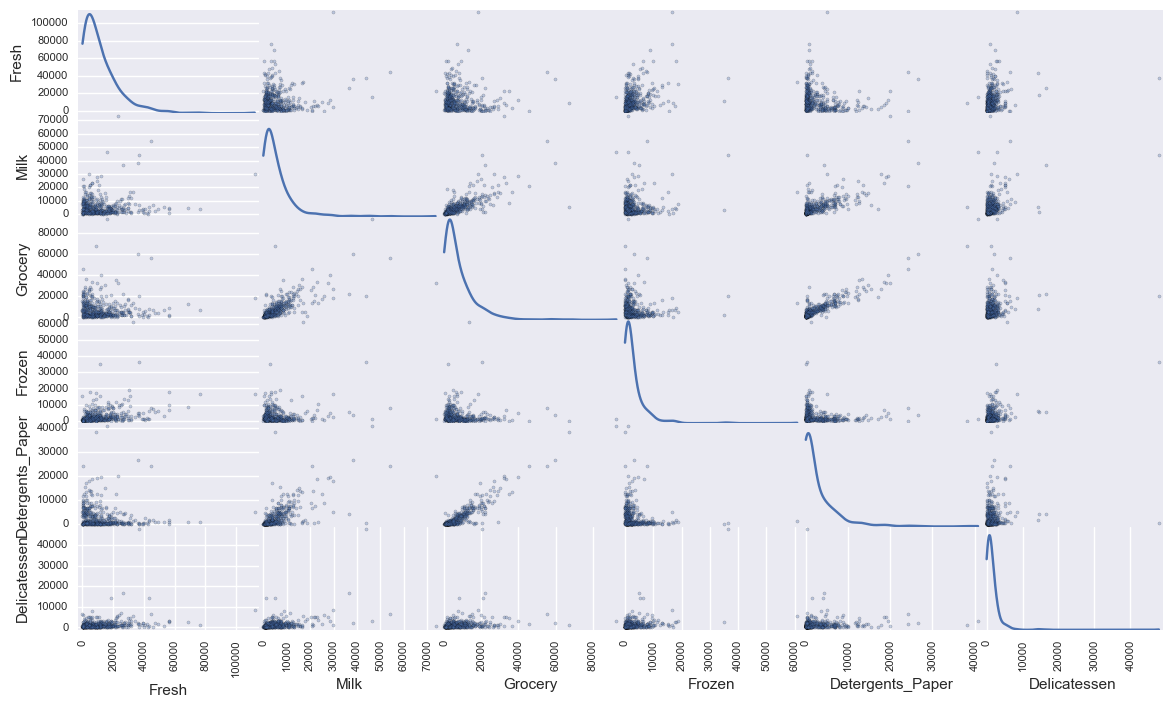

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
Two pairs showed some degree of correlation:
* Grocery and Detergents_Paper
* Grocery and Milk

However the distributions show large outliers and are skewed. On expanded/zoomed-in scale the distributions may look normal, however not clear from the linear scatterplot. This indicates we may need to scale and / or filter the data to view the intrinsic distributions.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

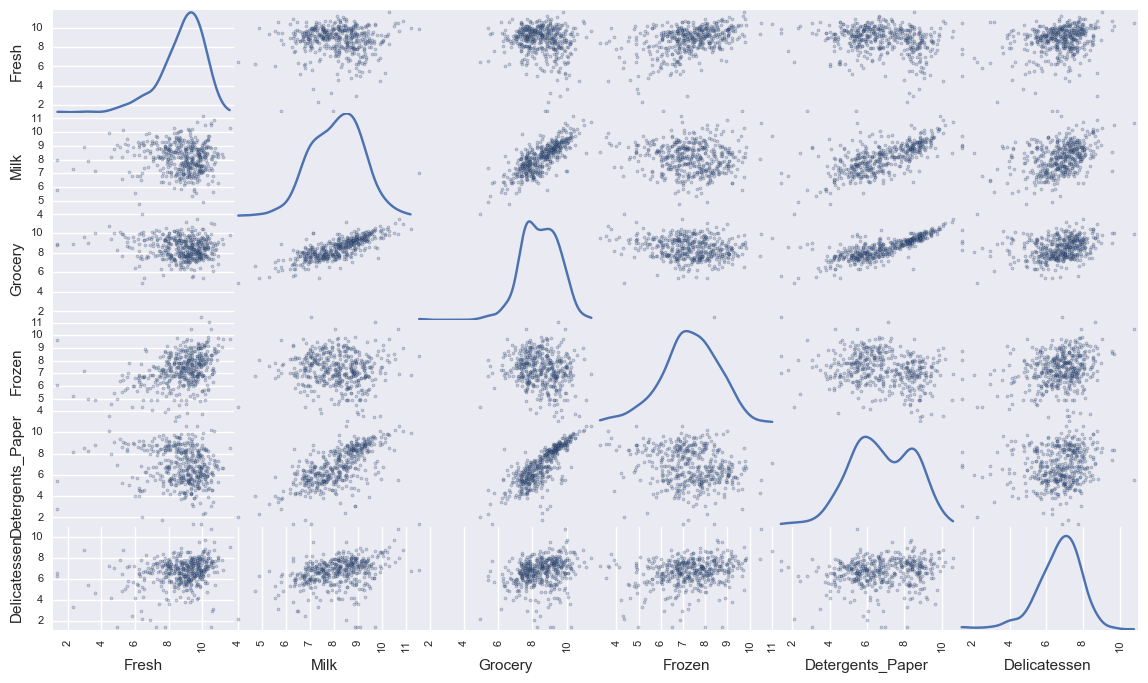

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = data.applymap(lambda x: np.log(1+x))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.applymap(lambda x: np.log(1+x))

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.149953,9.019180,8.542276,6.502790,7.493317,7.280697
1,9.599405,6.802395,7.232010,7.476472,4.043051,6.620073
2,8.399985,6.810142,7.122060,8.182280,5.036953,6.922644


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
81,5.393628,9.163354,9.575261,5.648974,8.964312,5.056246
95,1.386294,7.979681,8.740817,6.089045,5.411646,6.565265
96,3.178054,7.869784,9.001962,4.983607,8.262301,5.384495
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
171,5.303305,10.160569,9.894295,6.480045,9.079548,8.740497
193,5.198497,8.156510,9.918031,6.866933,8.633909,6.502790
218,2.944439,8.923325,9.629445,7.159292,8.475954,8.759826
304,5.087596,8.917445,10.117550,6.426488,9.374498,7.787797


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.040027,11.205027,10.377078,6.895683,9.907031,6.806829
98,6.222576,4.727388,6.658011,6.797940,4.043051,4.890349
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
356,10.029547,4.905275,5.389072,8.057694,2.302585,6.308098


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.432071,9.663325,9.723763,3.526361,8.847504,6.073045
57,8.597482,9.203718,9.257987,3.663562,8.932345,7.156956
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
145,10.000614,9.034200,10.457171,3.761200,9.440817,8.396381
175,7.759614,8.967759,9.382191,3.970292,8.342125,7.437206
264,6.979145,9.177817,9.645105,4.127134,8.696343,7.143618
325,10.395681,9.728241,9.519808,11.016496,7.149132,8.632306
420,8.402231,8.569216,9.490091,3.258097,8.827468,7.239933
429,9.060447,7.467942,8.183397,3.871201,4.442651,7.824846
439,7.933080,7.437795,7.828436,4.189655,6.169611,3.970292


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
161,9.428270,6.293419,5.648974,6.996681,1.386294,7.711549


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
109,7.249215,9.724959,10.274603,6.513230,6.729824,1.386294
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
137,8.035279,8.997271,9.021961,6.495266,6.582025,3.610918
142,10.519673,8.875287,9.018453,8.005033,3.044522,1.386294
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
183,10.514557,10.690831,9.912001,10.506026,5.480639,10.777789
184,5.793014,6.823286,8.457655,4.317488,5.814131,2.484907
187,7.799343,8.987572,9.192176,8.743532,8.149024,1.386294
203,6.369901,6.530878,7.703910,6.152733,6.861711,2.944439


Row indexes where multiple features listed as outliers: 5 -> [128, 154, 65, 66, 75]
Total Outliers Removed:  0
Checking data set size to confirm no outliers are removed:
log_data size:  (440, 6) , good_data size:  (440, 6)


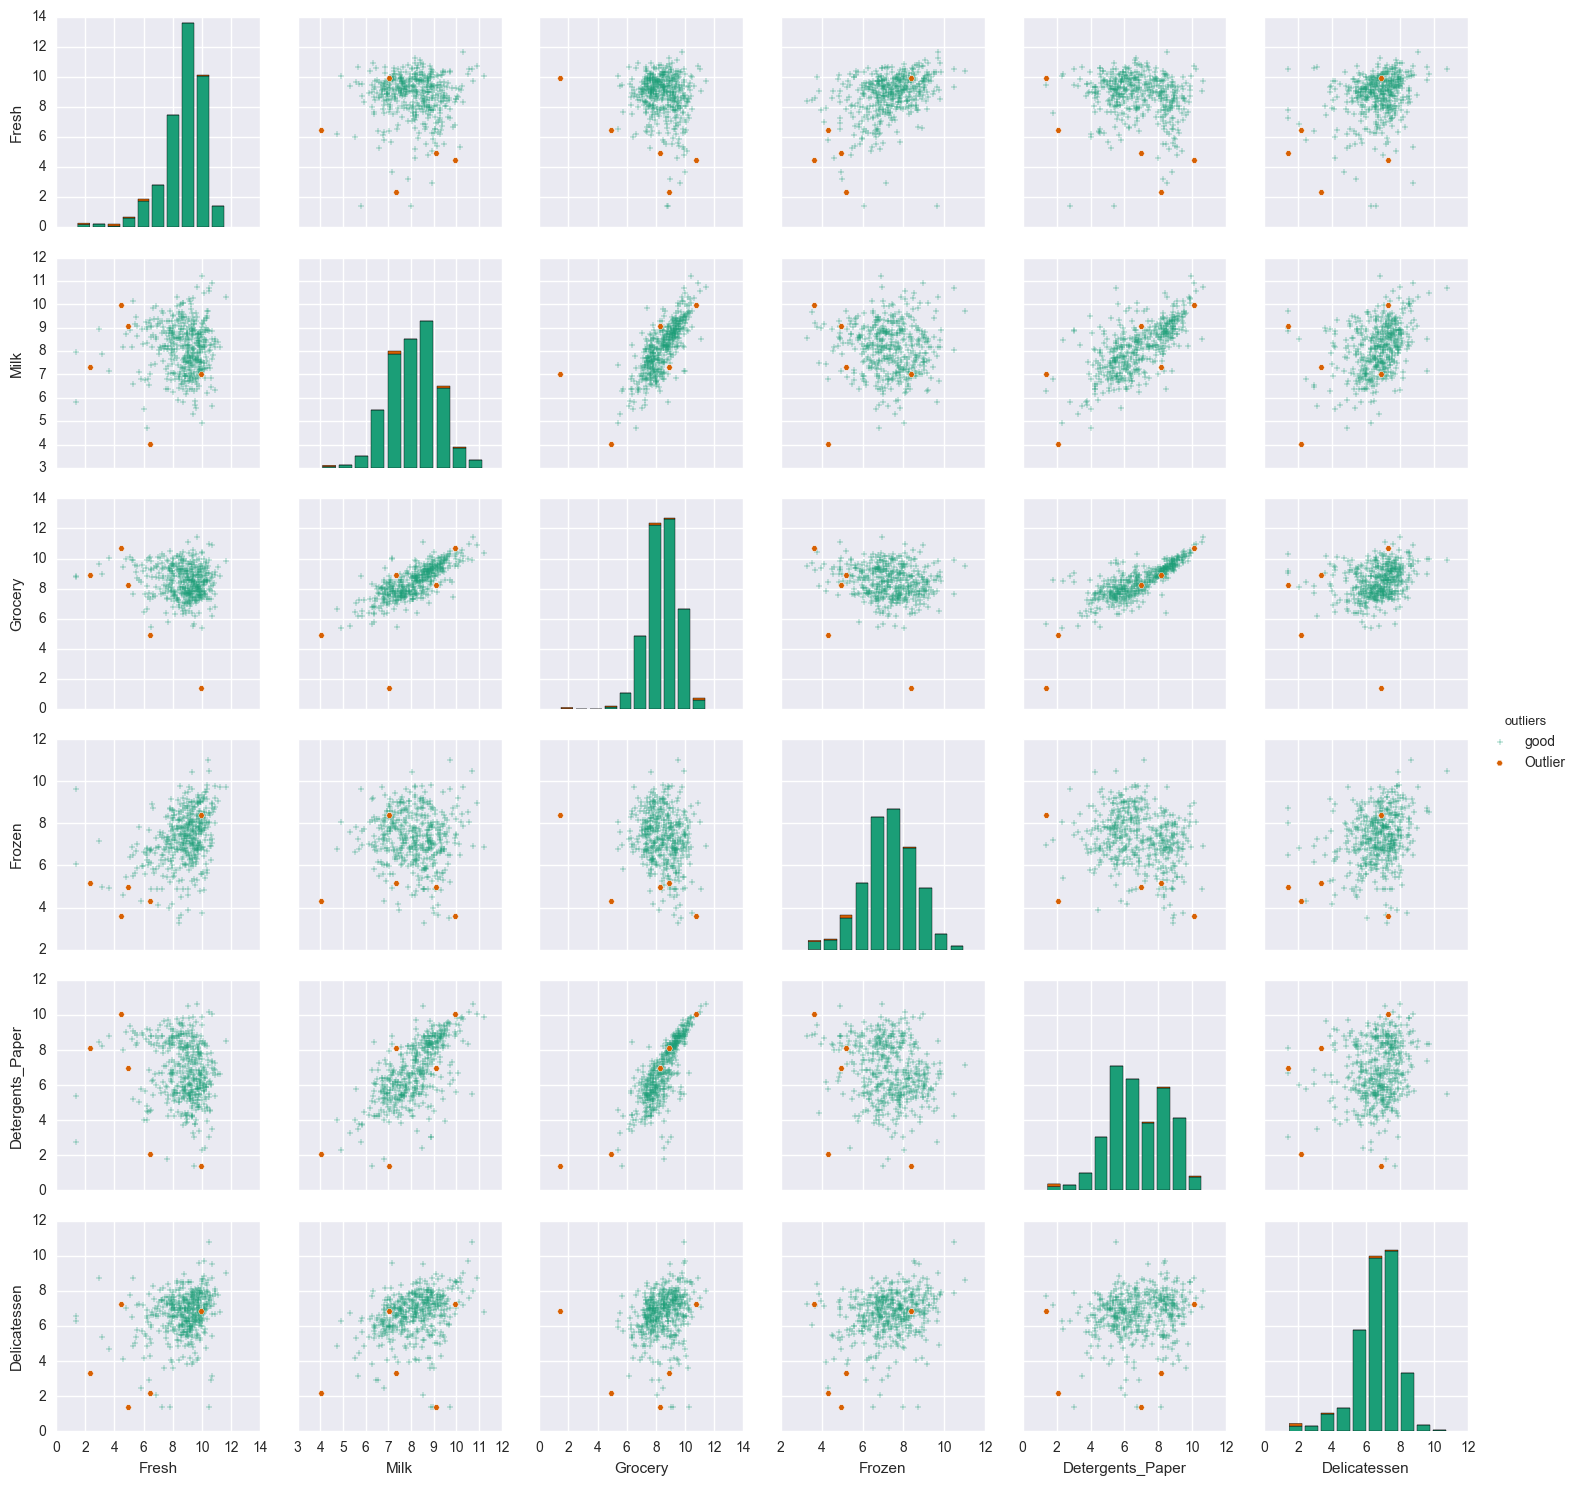

In [10]:
# For each feature find the data points with extreme high or low values

#dictionary for outliers in case we decide not to drop some outliers
outdict = {}

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    df = pd.DataFrame(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outdict.update({feature: df.index.tolist()})

#collecting all lists in dictionary
filter_loc  = [item for sublist in outdict.values() for item in sublist]

#finding duplicates
import collections
outindexes = [item for item, count in collections.Counter(filter_loc).items() if count > 1]
print "Row indexes where multiple features listed as outliers: {} -> {}".format(len(outindexes), outindexes)

outlabels = ['good' for i in range(len(log_data))]
for i in outindexes:
    outlabels[i] = 'Outlier'
    
outdf = pd.DataFrame()
outdf = outdf.append(log_data)
outdf['outliers'] = pd.Series(outlabels, index=outdf.index)
sns.pairplot(outdf, hue='outliers', palette="Dark2", markers=["+", "H"])
#based on the locations of outliers, decided not to remove any

# OPTIONAL: Select the indices for data points you wish to remove
outliers = []
print "Total Outliers Removed: ", len(outliers)

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print "Checking data set size to confirm no outliers are removed:"
print "log_data size: ", log_data.shape, ", good_data size: ", good_data.shape

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Used following method to determine the outliers :   
* If a point is beyond 1.5*IQR and also does not fall within the main distribution i.e. it indeed dalls on far tail of the dstribution, then it is determined as an outlier. Visually checked the outliers being removed for a feature against it's distribution from the plots above.
* Also if the total outliers removed should not be a large number, then we are affecting the population/distribution. The total number of outliers identified by  1.5*IQR criterion are 42, which is small (<10%) of the total dataset which is 440
* However on Matrix Scatterplot, some of the outliers though not part of the main distribution, are part of the correlations between features. One could argue that data points with multiple features (2 or more) having values outside 1.5*IQR range are outliers. However, visually looking at the scatter matrix  data plots, do not show them as redundunt and also they are part of the distributions which are showing correlation with other features. So no outliers removed as it is listed as "OPTIONAL". 



## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

|PCA Component| expl. var. | cum expl. var|
|-------------|------------|--------------|
|Dimension  1 |  0.443746  |    0.443746  |
|Dimension  2 |  0.276673  |    0.720419  |
|Dimension  3 |  0.115099  |    0.835518  |
|Dimension  4 |  0.095892  |    0.931409  |
|Dimension  5 |  0.045736  |    0.977145  |
|Dimension  6 |  0.022855  |    1.000000  |


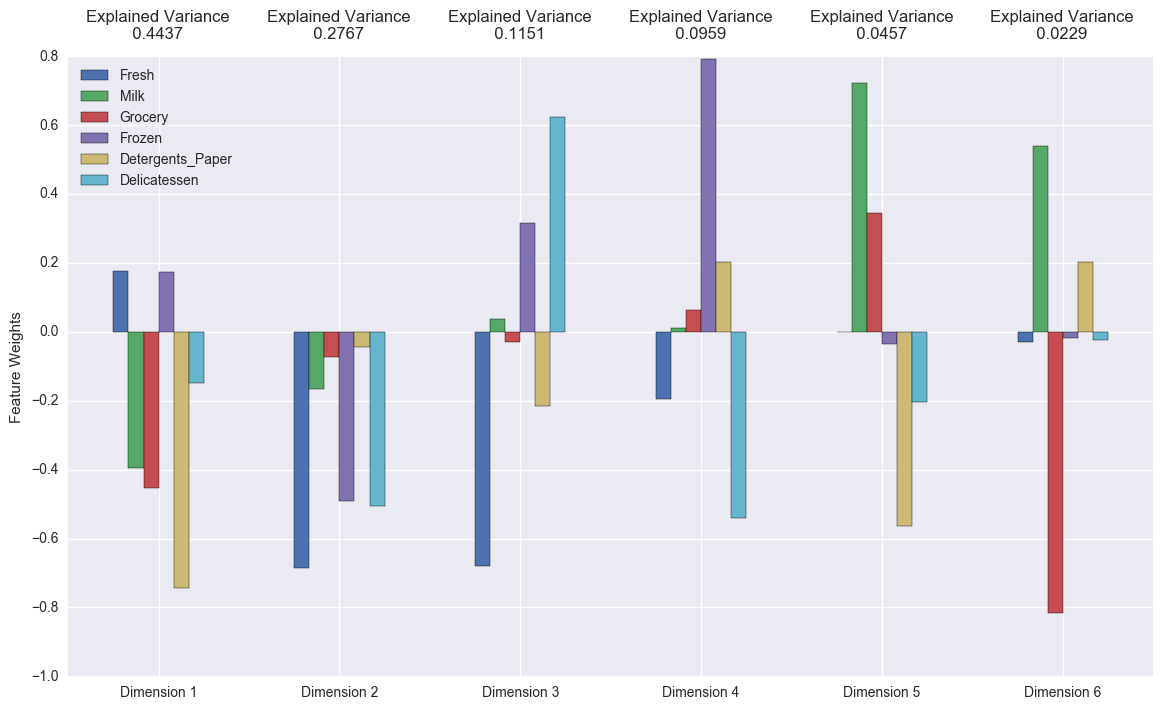

In [12]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6, whiten=True).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
print "|PCA Component| expl. var. | cum expl. var|"
print "|-------------|------------|--------------|"
for i in range(0, len(pca.explained_variance_ratio_)):
    print "|Dimension {0:2d} |  {1:5f}  |    {2:6f}  |".format(i+1, pca.explained_variance_ratio_[i],
                                                            np.cumsum(pca.explained_variance_ratio_)[i])

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**  Here's the summary of the explained variance for all the PCA components

|PCA Component| expl. var. | cum expl. var|
|-------------|------------|--------------|
|Dimension  1 |  0.443746  |    0.443746  |
|Dimension  2 |  0.276673  |    0.720419  |
|Dimension  3 |  0.115099  |    0.835518  |
|Dimension  4 |  0.095892  |    0.931409  |
|Dimension  5 |  0.045736  |    0.977145  |
|Dimension  6 |  0.022855  |    1.000000  |

* The first two components in total explain 0.7204 (72.04%) of data varaince. 
* The first four components in total explain 0.9314 (93.14%) of data varaince.    

For component-feature importance analysis, used +/-0.35 weight/loading for each feature for the respective component, chosen arbitrarily to make analysis simple.
* **Dimension 1: ** The features with high loading/weights are Milk, Grocery and Detergents_Paper. This would represent consumer spending in general big retail/grocery store
* **Dimension 2: ** The features with high weights are Fresh, Frozen and Delicatessen. This would indicate consumer spending in restaurants/food stores
* **Dimension 3: ** The features with high weights are Fresh and Delicatessen, however they have opposite signs indicating they are negatively correlated. This dimension is highlighting where the spending on Fresh is low, the spending on Delicatessen (i.e. special food) is high, likely bakeries
* **Dimension 4: ** The features with high weights are Frozen and Delicatessen and are negatively correlated. This is indicating spending in e.g. deli's

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [13]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.4934,-0.2235,-0.2468,-0.8695,0.2707,1.0791
1,1.5120,-0.1307,0.0060,-0.6400,0.2603,-0.6318
2,1.1348,0.0338,0.9202,0.1678,-0.7042,-0.0054


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [15]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, whiten=True).fit(good_data)
#print pca.get_covariance()
print "Check PCA components to see the right features weighted: "
print pca.components_
print pca.explained_variance_ratio_

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

Check PCA components to see the right features weighted: 
[[ 0.17598374 -0.39646681 -0.45477321  0.17410074 -0.74347594 -0.14818093]
 [-0.68428674 -0.16590365 -0.072854   -0.4922102  -0.04360531 -0.5047253 ]]
[ 0.44374606  0.27667282]


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [16]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.4934,-0.2235
1,1.5120,-0.1307
2,1.1348,0.0338


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

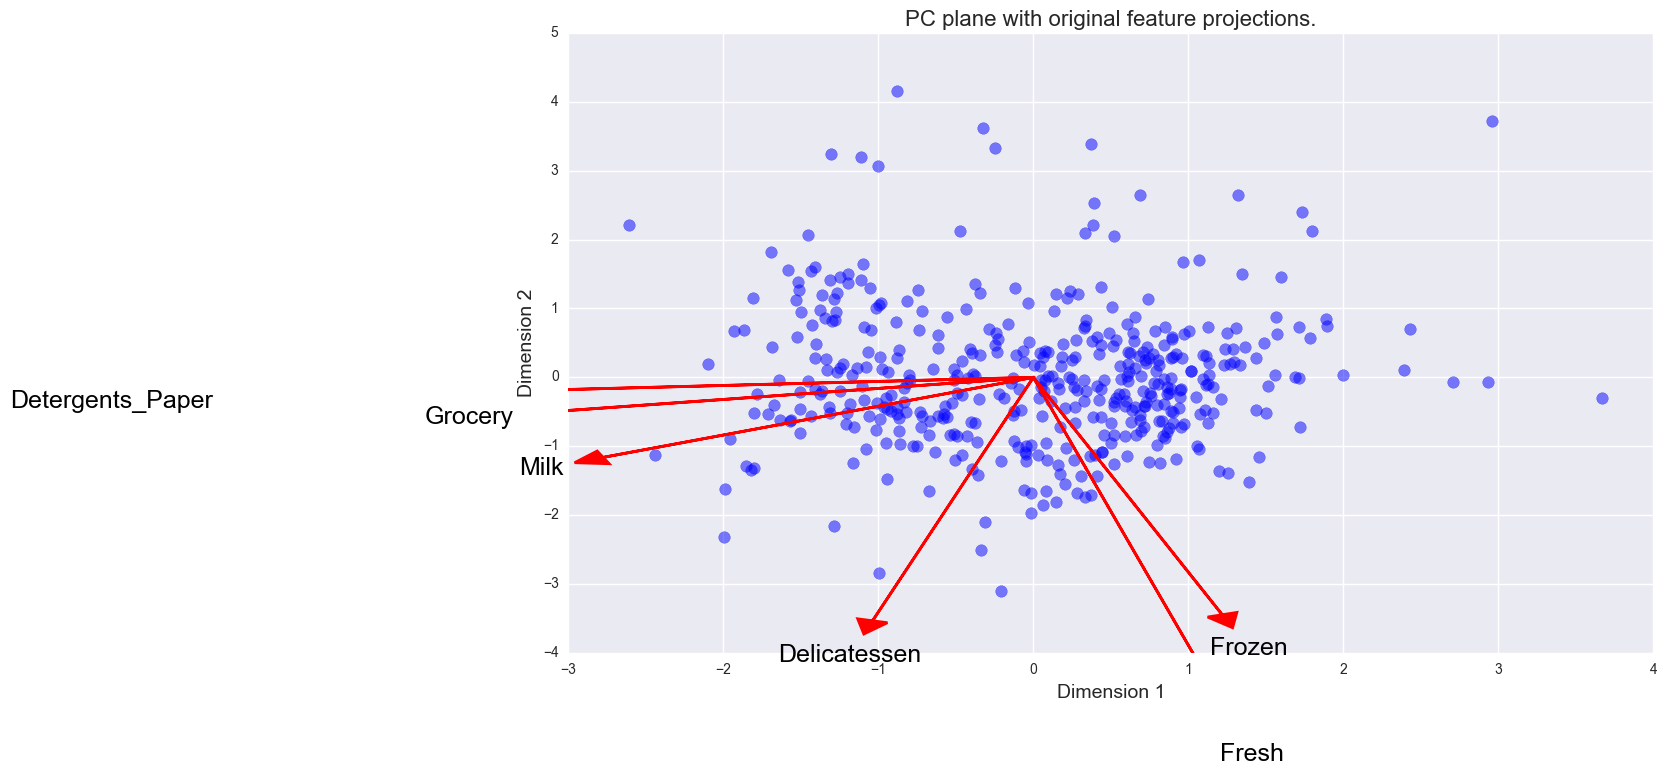

In [17]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**    
**K-Means Clustering: ** The KMeans algorithm defines k clusters in data by finding the k means of the k clusters and assigning the data points to clusters based on their feature similarity or distance to the means. However, the number of clusters "k" to be known aprioiri is the requiremnt of the algorithm.     
* Advantages: 1) it scales well to large number of samples usually on well structured (convex and isotropic) data and 2) has gauranteed convergence
* Disadvantages: 1) it responds poorly to elongated clusters or manifolds with irregular shapes and 2) algorithm may converge to a local minimum, depends on initialization of clusters

**Gaussian Mixture Model Clustering: ** A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions. It fits the "k" Gaussians representing each cluster by using expectation-maximization(EM) algorithm. It can give/define soft clusters with partial membership of clusters i.e. give  probability of finding a datapoint in a given cluster.
* Advantages: 1) Since gmm clustering can define soft clusters, it can be usefull in case of not very well structured data with seperated clusters and 2) it is a fast algorithm 
* Disdvantages: 1) Can converge on local minimum, 2) need to know number of clusters apriori, 3) can prodcue wrong results with small number of outliers  

The biplot above does not show disticnt clusters in the data and also has large outliers. If we need soft clustering with partial membership for datapoints in clusters to explore additional information like confidence levels, then we might prefer the GMM.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

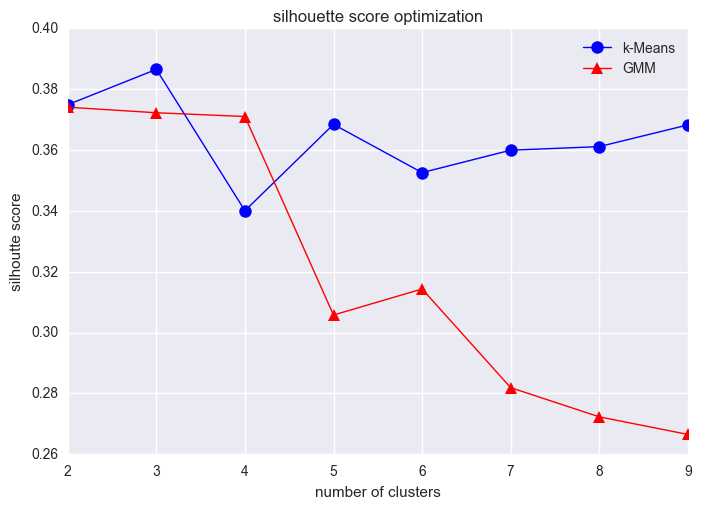

Selecting clusters = 3 for k-Means based on Silhoutte scores vs number of clusters


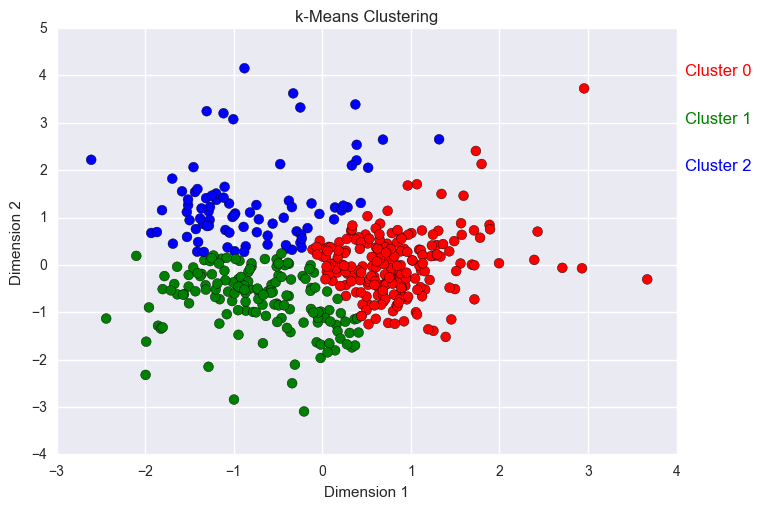

Selecting clusters = 2 for GMM based on Silhoutte scores vs number of clusters


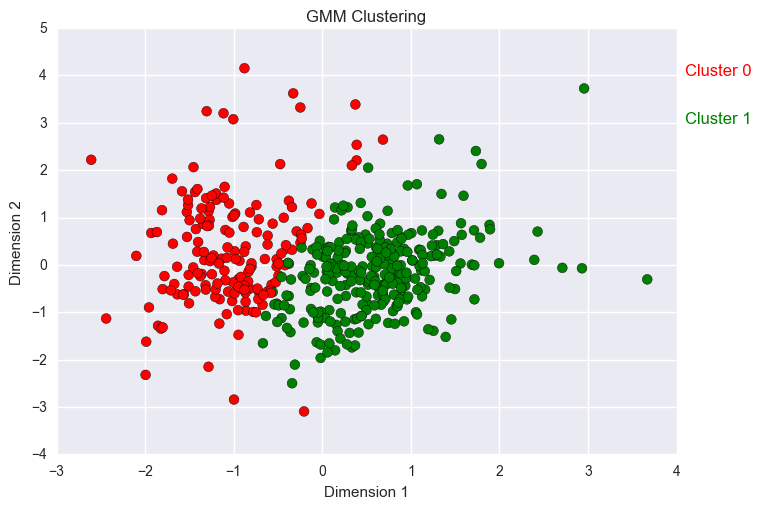

Used GMM Clustering for the example
| Clusters | Silhoutte Score |
|----------|-----------------|
|    2     |   0.374009      |
|    3     |   0.372189      |
|    4     |   0.370955      |
|    5     |   0.305752      |
|    6     |   0.314314      |
|    7     |   0.281905      |
|    8     |   0.272314      |
|    9     |   0.266543      |
Silhoutte Score for GMM clustering using 2 clusters: 0.3740


In [18]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import mixture
#Eploring Clusters and Methods
kmm_scorelist = []
gmm_scorelist = []

for nclusters in range(2,10):
    kmm = KMeans(n_clusters=nclusters, random_state=0).fit(reduced_data)
    gmm = mixture.GaussianMixture(n_components=nclusters, covariance_type='full', random_state=0).fit(reduced_data)
    kmm_preds = kmm.predict(reduced_data)
    gmm_preds = gmm.predict(reduced_data)
    kmm_score = metrics.silhouette_score(reduced_data, kmm_preds, metric='euclidean')
    kmm_scorelist.append(kmm_score)
    gmm_score = metrics.silhouette_score(reduced_data, gmm_preds, metric='mahalanobis')
    gmm_scorelist.append(gmm_score)
    
clusters = np.arange(2,10)
plt.figure()
#plt.bar(clusters, scoreseu, 0.35,  align='center', color='b')
plt.plot(clusters, kmm_scorelist, 'bo', ms=9, linewidth=1, linestyle='-', label='k-Means')
plt.plot(clusters, gmm_scorelist, 'r^', ms=9, linewidth=1, linestyle='-', label='GMM')
#plt.xticks(clusters, ('2', '3', '4', '5', '6'))
plt.ylabel('silhoutte score')
plt.xlabel('number of clusters')
plt.title("silhouette score optimization")
plt.legend()
plt.show()

def showclusters(df, axis1, axis2, titletxt, predictions, clusters):
    colormap = ['r', 'g', 'b', 'k', 'm', 'c']
    clustn = np.arange(0,clusters,1)
    predcolors = map(lambda x: colormap[x], predictions) 
    plt.scatter(df[axis1], df[axis2], c=predcolors, s=50)
    plt.xlabel(axis1)
    plt.ylabel(axis2)
    plt.title(titletxt)
    ymin,ymax = plt.ylim() 
    xmin,xmax = plt.xlim() 
    for i in clustn:
        s = 'Cluster %d' % (i,)
        plt.text(xmax+0.1, ymax-1-i, s, color=colormap[i])
    plt.show()

#Selecting clusters =3 for k-Means and clusters = 2 for GMM based on Silhoutte scores vs number of clusters
kmm = KMeans(n_clusters=3, random_state=0).fit(reduced_data)
gmm = mixture.GaussianMixture(n_components=2, covariance_type='full', random_state=0).fit(reduced_data)
kmm_preds = kmm.predict(reduced_data)
gmm_preds = gmm.predict(reduced_data)

print "Selecting clusters = 3 for k-Means based on Silhoutte scores vs number of clusters"
showclusters(reduced_data, 'Dimension 1', 'Dimension 2', 'k-Means Clustering', kmm_preds, 3)
print "Selecting clusters = 2 for GMM based on Silhoutte scores vs number of clusters"
showclusters(reduced_data, 'Dimension 1', 'Dimension 2', 'GMM Clustering', gmm_preds, 2)


print "Used GMM Clustering for the example"
print "| Clusters | Silhoutte Score |"
print "|----------|-----------------|"
for i,j in zip(clusters, gmm_scorelist):
    print '| {0:4d}     |   {1:6f}      |'.format(i,j) 

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = mixture.GaussianMixture(n_components=2, covariance_type='full', random_state=0).fit(reduced_data)


# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
#centers = clusterer.cluster_centers_
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = metrics.silhouette_score(reduced_data, preds, metric='mahalanobis')
print "Silhoutte Score for GMM clustering using 2 clusters: {:.4f}".format(score)

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
From visual data on clusters as well as Silhoutte scores it looked like Used GMM clustering is better for the example. Used GMM clustering for the project. The scores for various clusters are listed below and selected "2" clusters for example.

| Clusters | Silhoutte Score |
|----------|-----------------|
|    2     |   0.374009      |
|    3     |   0.372189      |
|    4     |   0.370955      |
|    5     |   0.305752      |
|    6     |   0.314314      |
|    7     |   0.281905      |
|    8     |   0.272314      |
|    9     |   0.266543      |

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

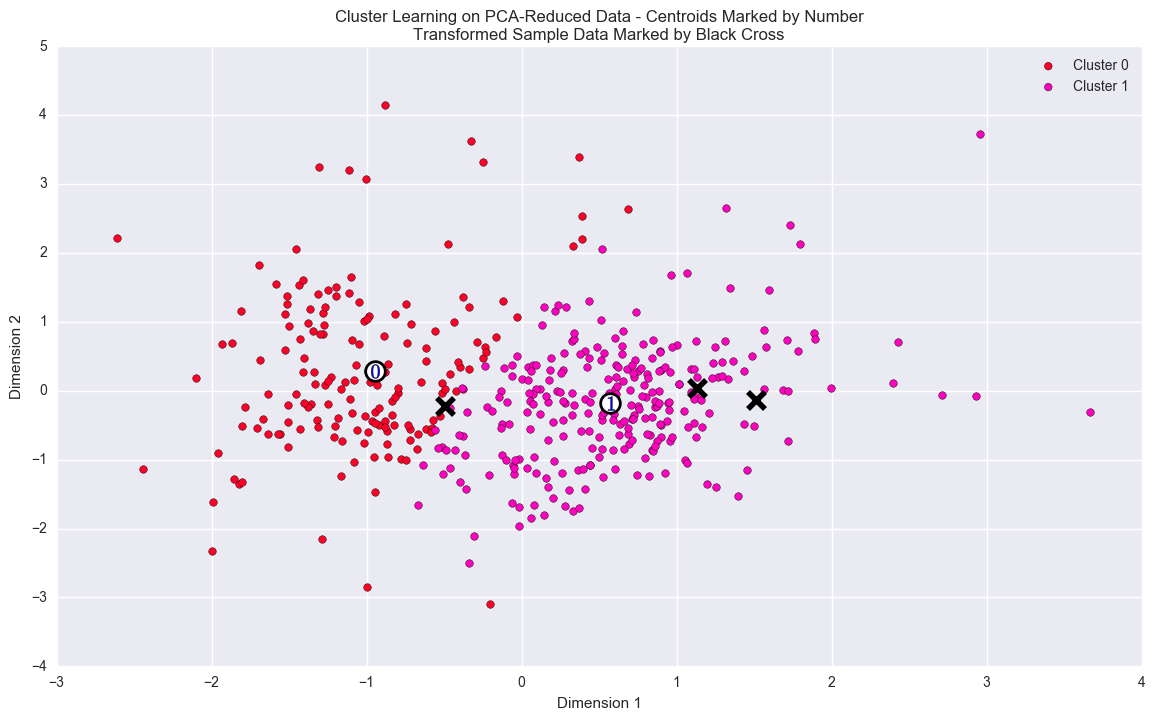

In [19]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [20]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
print "True Centers: "
display(true_centers)

data_stats = data.describe()
print "Data Statistics: "
display(data_stats)

stat_match = [['mean' for x in range(6)] for y in range(2)] 
k = 0
for i, row in true_centers.iterrows():
    for j, feature in enumerate(list(true_centers)):
            distancelist = [('25%', abs(data_stats.loc['25%'][feature]- row[feature])),
                            ('50%', abs(data_stats.loc['50%'][feature]- row[feature])),
                            ('75%', abs(data_stats.loc['75%'][feature]- row[feature]))]
            stat_match[k][j] = '~'+sorted(distancelist, key=lambda distancelist: distancelist[1])[0][0]
    k = k + 1

print "True Centers comparison to Percentiles in Data Statistics: "
df = pd.DataFrame(stat_match, columns = data.keys())
df.index = segments
display(df)

True Centers: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3083.0,7058.0,11485.0,814.0,4067.0,838.0
Segment 1,9471.0,2151.0,2680.0,2137.0,355.0,761.0


Data Statistics: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


True Centers comparison to Percentiles in Data Statistics: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,~25%,~75%,~75%,~25%,~75%,~50%
Segment 1,~50%,~25%,~25%,~50%,~25%,~50%


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** We used following in the dataset exploration 
* **Sample 1:** Has spending values for all features/categories between 75%-50%, except for "Frozen". This would indicate it is a typical large grocery/retail store.
* **Sample 2:** Has values for "Fresh" between max-75%, "Frozen" between 75%-50% and Delicatessen between 50%-25%. Other categrories have values below 25%. This indicates a this is a store specializing in Fresh/Frozen/Delciatessen possibly a food store or a restaurant.     

**Segment 0** matches **sample 2** description closely i.e. **Restaurant/Food store** and    
**Segment 1** is close to **Sample 1** description i.e. **a large grocery/retail store**.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [23]:
smpleno = ['Sample {}'.format(i) for i in range(0,len(samples))]
samples.index = smpleno
print "Samples:"
display(samples)

#From previous section
print "From previous section, True Centers comparison to Percentiles in Data Statistics: "
display(df)

distance0 = 0.0
distance1 = 0.0
sample_match = [['mean' for x in range(6)] for y in range(3)] 
k = 0
for i, row in samples.iterrows():
    for j, feature in enumerate(list(samples)):
            distancelist = [('25%', abs(data_stats.loc['25%'][feature]- row[feature])),
                            ('50%', abs(data_stats.loc['50%'][feature]- row[feature])),
                            ('75%', abs(data_stats.loc['75%'][feature]- row[feature]))]
            sample_match[k][j] = '~'+sorted(distancelist, key=lambda distancelist: distancelist[1])[0][0]
    k = k + 1
    
print "Samples Comparison to Data Statitics: "
ndf = pd.DataFrame(sample_match, columns = data.keys())
ndf.index = smpleno
display(ndf)

print "Sample Point Predictions:  "
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Samples:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Sample 0,9413,8259,5126,666,1795,1451
Sample 1,14755,899,1382,1765,56,749
Sample 2,4446,906,1238,3576,153,1014


From previous section, True Centers comparison to Percentiles in Data Statistics: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,~25%,~75%,~75%,~25%,~75%,~50%
Segment 1,~50%,~25%,~25%,~50%,~25%,~50%


Samples Comparison to Data Statitics: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Sample 0,~50%,~75%,~50%,~25%,~50%,~75%
Sample 1,~75%,~25%,~25%,~50%,~25%,~50%
Sample 2,~25%,~25%,~25%,~75%,~25%,~50%


Sample Point Predictions:  
Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:** Since the raw data is skewed, for checking the similarity of the data points to cluster centers, it is better to look at the distribution than calculate distance metric e.g. (eucledian) on raw data.    
If you look at the Delicatessen feature in cluster centers', both centers are close to 50% of data, indicating it may not be deciding feature for clusters.    
From the samples similarity to the cluster centers and data statitics it is clear that Sample 1 and Sample 2 would fall in Cluster 1.  
For Sample 0, two features (Milk, Frozen) are closer to cluster 0 center and  Fresh is closer to cluster 1. The other two important ones Grocery, Detergents_Paper are closer to 50%, however since the correlated feature Milk is in cluster 0,  one would expect the Sample 0 to be cluster 0.    

So, yes the predictions match the sample point locations in respective clusters.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** The two segments are 1) Large Retail/Grocery stores with main sales in Milk/Grocery/Detergents_paper and 2) Restaurants/Food Stores with main sales in Fresh/Frozen/Delicatessen. One would expect the segment with more Fresh/Delicatessen demand to be be more sensitive to delivery schedule or frequency due to perishable nature of goods. Whereas large retail stores with higher demand in general grocery items/Detergents_paper are not going to be affected significantly. Also these stores should have larger inventories, compared to Restaurants. So you would expect large retail/grocery store segment to react positively to the change in delivery service. 

We can use following methodlogy to run the A/B testing:   
Create two random samples sets (set 1 and set 2) of customers (e.g. set 1 comprising 40% cluster 0 and 60% from cluster 1). One set e.g. Set 1, gets no change to deliviery schedule, and Set 2 gets modified delivery schedule. Monitor a metric for four combinations e.g. revenues split for for each Set and each Cluster (Rev(Set1, Cluster0), Rev(Set1, Cluster1), Rev(Set2, Cluster0), Rev(Set2,Cluster1)). Compare any % change (or normalized rate of change) for two sets Rev(Set1,Cluster0) vs. Rev(Set2,Cluster0) and Rev(Set1, Cluster1) vs. Rev(Set2,Cluster1). The cluster that shows more % change is more sensitive to the change in delivivery schedule (i.e. Set conditions).

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** We can use the features of the customer segment data (either transformed or reduced using PCA) to train the model with labels "Cluster 0" and "Cluster 1" (or simply 0 and 1). Then use this trained model on the new data to predict whether the customer will be Cluster 0 or "0" or Cluster 1 or "1".

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

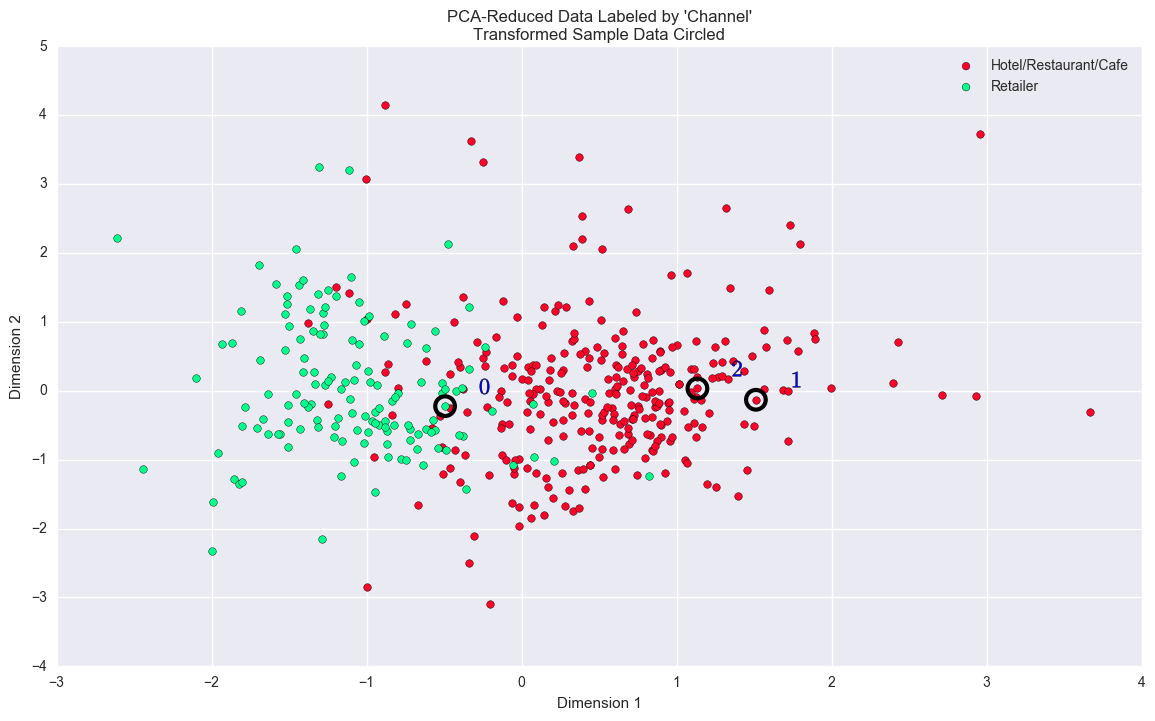

In [22]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The clustering alogrithm output is pretty close to the actual clusters inthe data. However, acutal data has some overlap of the clusters, which is difficult to predict. However the predicted clusters, overall capture the structure in data. Also the segments identified as dominated by Milk/Grocery/Detergents_Paper i.e. large grocery/retail stores and the one dominated by Fresh/Frozen/Delicatessen i.e. food store/restaurants are consistent.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.